In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

In [2]:
img_folder_name=os.listdir()

In [3]:
bgr_source=[]
bgr_target=[]
bgr_result=[]
lab_source=[]
lab_target=[]
lab_result=[]
for i in img_folder_name:
    img=cv.imread(i)
    if(i[:2]=="in"):
        bgr_source.append(img)
        lab_source.append(cv.cvtColor(img,cv.COLOR_BGR2LAB).astype("float32"))
        
    elif(i[:3]=="tar"):
        bgr_target.append(img)
        lab_target.append(cv.cvtColor(img,cv.COLOR_BGR2LAB).astype("float32"))
    else:
        bgr_result.append(img)
        lab_result.append(cv.cvtColor(img,cv.COLOR_BGR2LAB))
    

In [4]:
l_source=[]
a_source=[]
b_source=[]
l_target=[]
a_target=[]
b_target=[]
for i in range(len(lab_source)):
    l_source.append(lab_source[i][:,:,0])
    a_source.append(lab_source[i][:,:,1])
    b_source.append(lab_source[i][:,:,2])
    l_target.append(lab_target[i][:,:,0])
    a_target.append(lab_target[i][:,:,1])
    b_target.append(lab_target[i][:,:,2])
    

In [5]:
def compute_std(l_channel,a_channel,b_channel):
    result=[]
    for i in range(len(l_channel)):
        result.append(np.array([l_channel[i].std(),a_channel[i].std(),b_channel[i].std()]))
    return np.array(result)

In [6]:
def compute_means(l_channel,a_channel,b_channel):
    result=[]
    for i in  range(len(l_channel)):
        result.append(np.array([l_channel[i].mean(),a_channel[i].mean(),b_channel[i].mean()]))
    return np.array(result)

In [7]:
mean_target=compute_means(l_target,a_target,b_target)
mean_source=compute_means(l_source,a_source,b_source)
std_target=compute_std(l_target,a_target,b_target)
std_source=compute_std(l_source,a_source,b_source)

In [8]:
def find_labstar(data,label):
    data_star=[]
    for i in range(len(data)):
        data_star.append(np.subtract(data[i],label[i]))
    return data_star    

In [9]:
l_star=find_labstar(l_source,mean_source[:,0])
a_star=find_labstar(a_source,mean_source[:,1])
b_star=find_labstar(b_source,mean_source[:,2])

In [10]:
def finalize(lab_star,std_src,std_tar):
    result=[]
    for i in range(len(lab_star)):
        division=np.divide(std_src[i],std_tar[i])
        result.append(np.multiply(lab_star[i],division))
    return result

In [11]:
l_result=finalize(l_star,std_source[:,0],std_target[:,0])
a_result=finalize(a_star,std_source[:,1],std_target[:,1])
b_result=finalize(b_star,std_source[:,2],std_target[:,2])

In [13]:
def final_compt(data,label):
    data_final=[]
    for i in range(len(data)):
        x=np.subtract(data[i],-label[i])
        data_final.append(np.uint8(np.clip(x,0,255)))
    return data_final   

In [14]:
l_result=final_compt(l_result,mean_target[:,0])
a_result=final_compt(a_result,mean_target[:,1])
b_result=final_compt(b_result,mean_target[:,2])

In [16]:
result_lab=[]
for i in range(len(l_result)):
    img=cv.merge([l_result[i],a_result[i],b_result[i]])
    result_lab.append(img)

In [17]:
result_bgr=[]
for i in range(len(l_result)):
    img =  cv.cvtColor(result_lab[i], cv.COLOR_LAB2BGR)
    result_bgr.append(img)

In [19]:
def save_img(data,name):
    for i in range(len(data)):
        filename=name+str(i)+".jpg"
        cv.imwrite(filename,data[i])

In [20]:
save_img(result_bgr,"result_part1_")

In [21]:
def create_hist_3d(img,title):
    print("Total pixel = ",img.shape[0]*img.shape[1]*3)
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.title("Distribution of {} image pixel value".format(title))
    plt.xlabel("Pixel value")
    plt.ylabel("Number of pixel")
    plt.show()





In [22]:
os.chdir("..")

In [23]:
os.chdir("graph")

In [24]:
def create_hist_gray(img,title,name):
    img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    histr = cv.calcHist(img,[0],None,[256],[0,256])
    plt.plot(histr,color = "black")
    plt.xlim([0,256])
    plt.title("Distribution of {} image pixel value".format(title))
    plt.xlabel("Pixel value")
    plt.ylabel("Count of pixel")
    plt.savefig(name+".png",facecolor="w",bbox_inches="tight",pad_inches=0.3, transparent=True)
    plt.show()

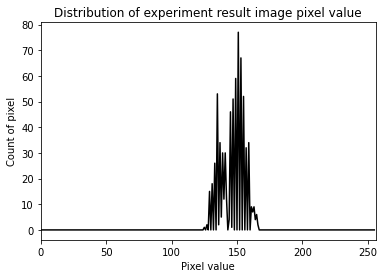

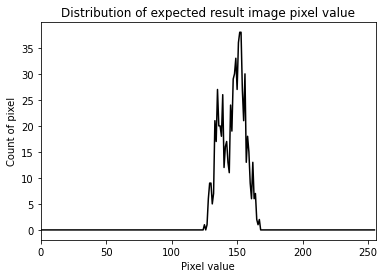

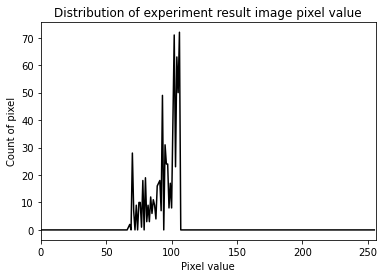

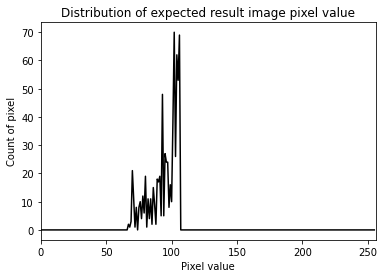

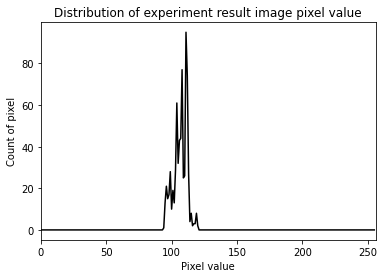

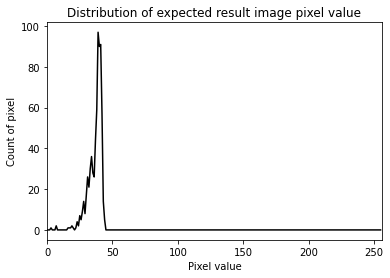

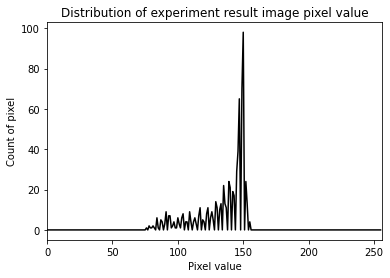

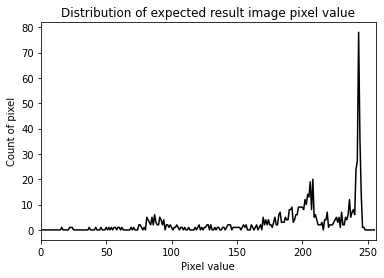

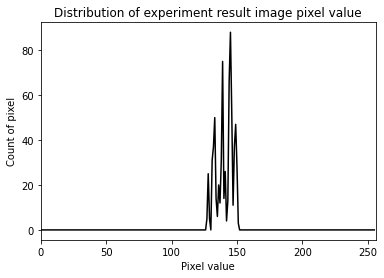

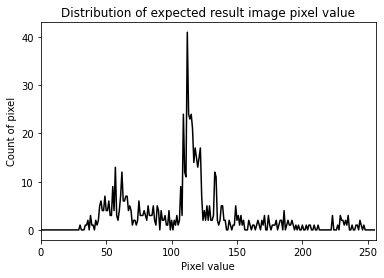

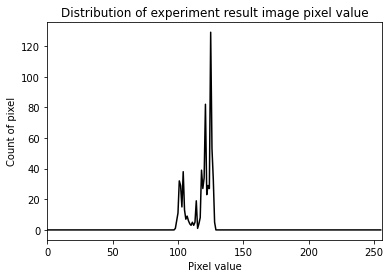

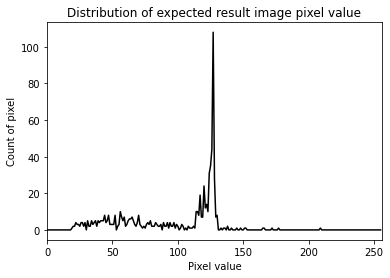

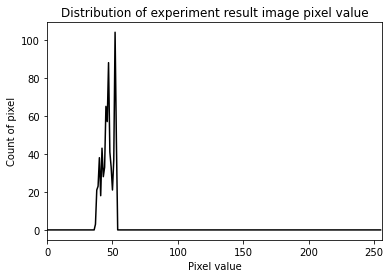

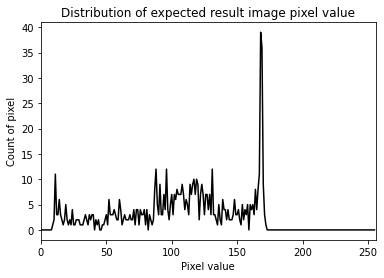

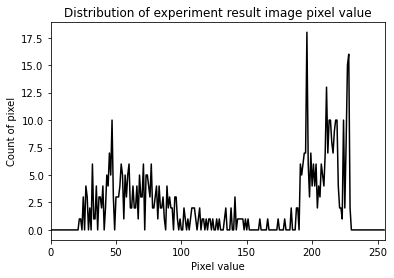

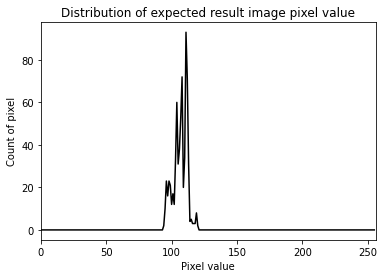

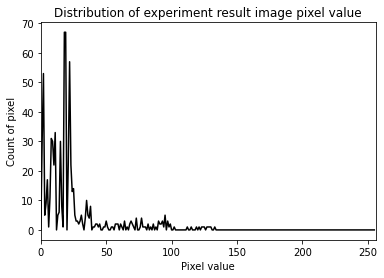

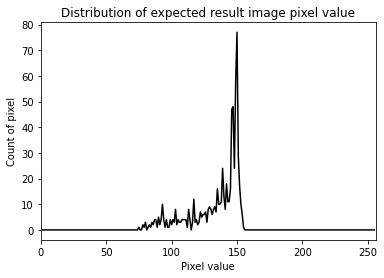

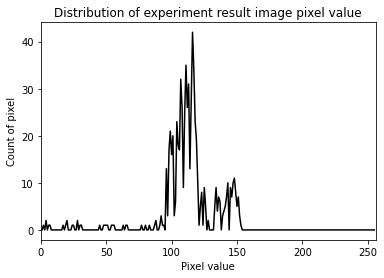

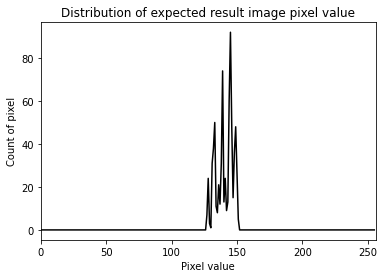

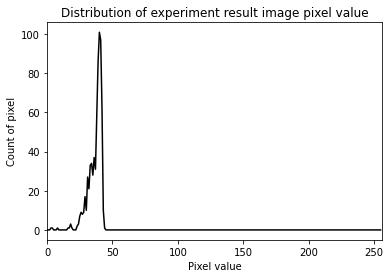

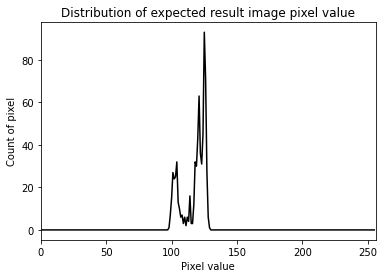

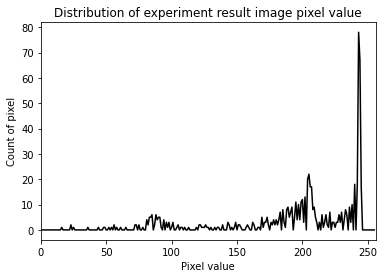

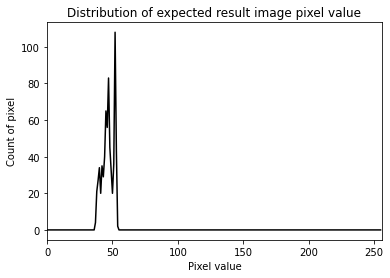

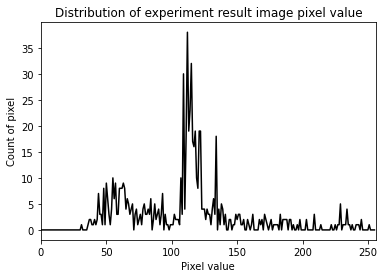

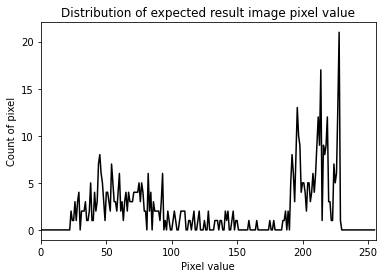

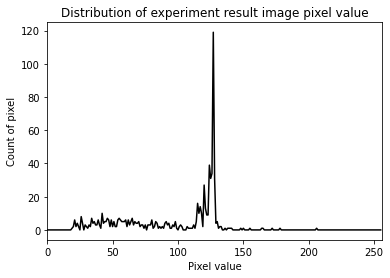

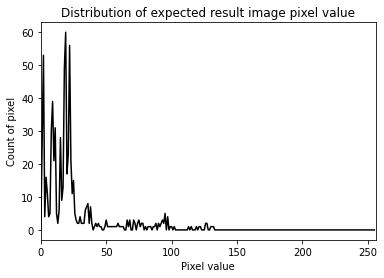

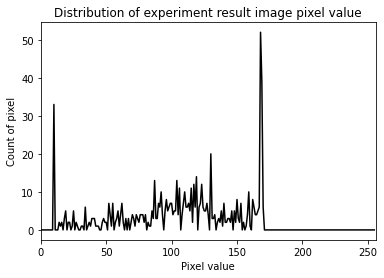

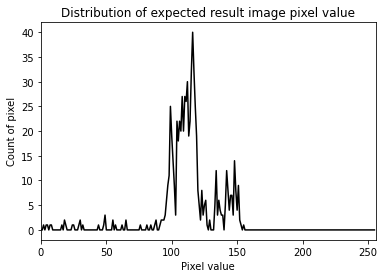

In [25]:
for a in range(15):
    create_hist_gray(result_bgr[a],"experiment result","result"+str(a))
    create_hist_gray(bgr_result[a],"expected result","expected"+str(a))

# #PART2:

In [26]:
def show_image(img_data):
    for i in range(len(img_data)):
        cv.imshow("img"+str(i),img_data[i])
        cv.waitKey(0)
        cv.destroyAllWindows()

In [27]:
img_source=bgr_source.copy()
img_target=bgr_target.copy()

In [28]:
min_row=[min(img_source[i].shape[1],img_target[i].shape[1]) for i in range(len(img_source))]
min_column=[min(img_source[i].shape[0],img_target[i].shape[0]) for i in range(len(img_source))]

In [29]:
img_source=[cv.resize(img_source[i],(min_row[i],min_column[i])) for i in range(len(img_source))]
img_target=[cv.resize(img_target[i],(min_row[i],min_column[i])) for i in range(len(img_target))]

In [30]:
img_target[11].shape

(393, 700, 3)

In [31]:
img_source[11].shape

(393, 700, 3)

In [32]:
def split_img(img,row_count,column_count):
    data=[]
    row_before=0
    column_before=0
    for i in range(1,row_count+1):
        row=img.shape[0]//row_count + row_before
        for j in range(1,column_count+1):
            column=img.shape[1]//row_count + column_before
            data.append(img[row_before:row,column_before:column])
            column_before=column
        row_before=row
        column_before=0
    return data

In [33]:
count=4

In [34]:
source_split=[split_img(img_source[i],count,count) for i in range(len(img_source))]
target_split=[split_img(img_target[i],count,count) for i in range(len(img_target))]

In [35]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [36]:
change_indeks=[]
for k in range(len(source_split)):
    change_index=[]
    for i in range(count**2):
        error=[]
        for j in range(count**2):
            error.append(mse(source_split[k][i],target_split[k][j]))
        change_index.append(error.index(min(error)))
    change_indeks.append(change_index)


In [37]:
def change_img_part(indeks,src_splt,trgt_splt):
    result_img=[]
    for i in range(len(indeks)):
        result_img.append((src_splt[i]+trgt_splt[indeks[i]])//2)
    return result_img

In [38]:
result=[change_img_part(change_indeks[i],source_split[i],target_split[i]) for i in range(len(change_indeks))]

In [39]:
result_imgs=[]
for k in range(len(result)):
    result_img=[]
    for i in range(0,count**2,count):
        result_img.append(np.hstack([result[k][i+a] for a in range(count)]))
    result_img=np.vstack([result_img[i] for i in range(count)])
    result_imgs.append(result_img)

In [42]:
save_img(result_imgs,"result_part2_")

In [43]:
show_image(result_imgs)